*Міністерство освіти і науки УкраїниНаціональний технічний університет України «КПІ ім. Ігоря Сікорського»*

*Факультет інформатики та обчислювальної техніки*

*Кафедра інформатики та програмної інженерії*

*Аналіз даних в інформаційно-управляючих системах*

Виконанав студент:

ІП-01 Хернуф Валід Алі-Еддін

Київ 2022


---


# **Звіт до лабораторної роботи №3**





## **Завдання для самоперевірки**

Спочатку імпортуємо усі потрібні бібліотеки для праці: pandas та matplotlib для праці з даними, io та google.colab для праці з google colab.

Також імпортуємо до google colab файл Data1.csv.

In [50]:
import matplotlib.pyplot as pyp
import pandas as p
import io
from google.colab import files
from google.colab import data_table

data_table.enable_dataframe_formatter()

uploaded = files.upload();

Saving Data1.csv to Data1 (7).csv


### 1.   Скачування даних із файлу Data1.csv 



In [51]:
def read_dataset(path):
    return p.read_csv(io.BytesIO(uploaded[path]), sep=';', encoding='cp1252')
    #in regular python script we would use:
    #return p.read_csv(path, sep=';', encoding='cp1252')

dFrame = read_dataset("Data1.csv")


### 2.   Дослідження структури файлу Data1.csv


In [52]:
def getInfo(data):
    data.info()

getInfo(dFrame)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Country                  136 non-null    object
 1   ISO                      136 non-null    object
 2   Conflicts intencity      136 non-null    int64 
 3   Hospital beds            136 non-null    object
 4   High-technology exports  136 non-null    object
 5   GDP per capita           136 non-null    int64 
 6   Population               136 non-null    object
dtypes: int64(2), object(5)
memory usage: 7.6+ KB



### 3.   Виведення перших 5 рядків


In [53]:
def print_first_n_rows(data, n):
    print(f'\nFirst{n} rows:')
    print(data.head(n))

print_first_n_rows(dFrame, 5)


First5 rows:
     Country  ISO  Conflicts intencity Hospital beds High-technology exports  \
0    Albania  ALB                    0           2,6                15123662   
1    Algeria  DZA                    3                               2449466   
2     Angola  AGO                    3                                         
3  Argentina  ARG                    1           4,7              1442450760   
4    Armenia  ARM                    3           3,9                16565073   

   GDP per capita   Population  
0         3266790  11926892453  
1        26554329   1,5608E+11  
2        12553446  89633156470  
3        33193918  5,45866E+11  
4         3505251  10547331235  


### 4.   Виведення останніх 6 рядків

In [54]:
def print_last_n_rows(data, n):
    print(f'\nLast{n} rows:')
    print(data.tail(n))

print_last_n_rows(dFrame, 6)


Last6 rows:
                               Country  ISO  Conflicts intencity  \
130                      United States  USA                    3   
131                            Uruguay  URY                    0   
132  Venezuela, Bolivarian Republic of  VEN                    3   
133                           Viet Nam  VNM                    3   
134                              Yemen  YEM                    5   
135                             Zambia  ZMB                    0   

    Hospital beds High-technology exports  GDP per capita   Population  
130           2,9             1,53526E+11       252981000  1,85691E+13  
131           2,5               266119238         3132050  52419720714  
132           0,9                18092984        20332079  3,71006E+11  
133                           38735943417        67242400  2,02616E+11  
134           0,7                 2946931        12661614  27317605346  
135                              36503179         8239732  19551093303  

### 5.   Видалення стовпчика з абревіатурами

In [55]:
def remove_column(data, column):
    return data.drop(column, axis = 1)

dFrame = remove_column(dFrame, 'ISO')

### 6.   Додавання стовпчика з повним GDP

In [56]:
def convert_column_to_float(data, column):
    data[column] = data[column] .str.replace(',', '.').astype(float)

def add_column(data, column, condition):
    data[column] = condition

def replace_blank_with_zeros(dataset):
    return dataset.replace(' ', 0)

convert_column_to_float(dFrame, 'Population')
add_column(dFrame, 'Total GDP', dFrame['Population'] * dFrame['GDP per capita'])
dFrame = replace_blank_with_zeros(dFrame)

### 7.   Виведення всього summary




In [57]:
print(dFrame.describe())

       Conflicts intencity  GDP per capita    Population     Total GDP
count           136.000000    1.360000e+02  1.360000e+02  1.360000e+02
mean              1.977941    3.725446e+07  5.362308e+11  1.632076e+20
std               1.532207    1.272781e+08  1.941314e+12  1.184000e+21
min               0.000000    7.043900e+04  9.645992e+08  1.005393e+14
25%               0.000000    3.502713e+06  1.382807e+10  5.515877e+16
50%               3.000000    8.345330e+06  5.240744e+10  4.559736e+17
75%               3.000000    2.329577e+07  2.989508e+11  4.711841e+18
max               5.000000    1.150780e+09  1.856910e+13  1.288770e+22


### 8.   Побудування діаграми розмаху для GDP per capita


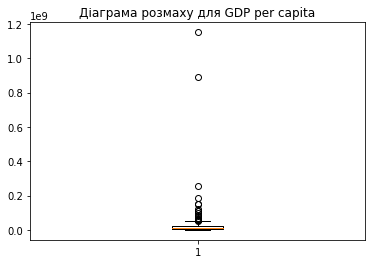

In [58]:
def do_boxplot(data, title, column):
    pyp.figure()
    pyp.title(title)
    pyp.boxplot(data[column])

do_boxplot(dFrame, 'Діаграма розмаху для GDP per capita', 'GDP per capita')
pyp.show()

### 9.   Побудування графіку залежності High-technology exports від GDP


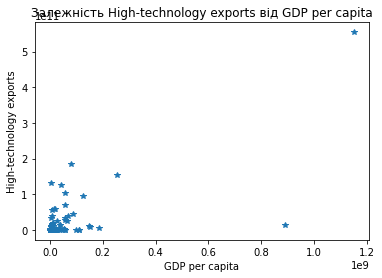

In [59]:
def plot_tech_exports_from_gdp_dependency(data):
    pyp.figure()
    pyp.title('Залежність High-technology exports від GDP per capita')
    pyp.xlabel('GDP per capita')
    pyp.ylabel('High-technology exports')
    pyp.plot(
        data['GDP per capita'],
        data['High-technology exports'],
        '*'
    )

convert_column_to_float(dFrame, 'High-technology exports')
plot_tech_exports_from_gdp_dependency(dFrame)
pyp.show()



---


## **Основне та додаткове завдання**

Спочатку імпортуємо до google colab другий файл

In [60]:
uploaded = files.upload();

Saving Data2.csv to Data2 (4).csv


### 1.   Скачування даних із файлу Data2.csv


In [66]:
#Функція read_dataset є вище у 1 п. завданнь на самоперевірку

dFrame = read_dataset("Data2.csv")

### 2.   Дослідження структури даних


In [67]:
#Функція getInfo є вище у 2 п. завданнь на самоперевірку

getInfo(dFrame)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    217 non-null    object 
 1   Region          217 non-null    object 
 2   GDP per capita  190 non-null    object 
 3   Populatiion     216 non-null    float64
 4   CO2 emission    205 non-null    object 
 5   Area            217 non-null    object 
dtypes: float64(1), object(5)
memory usage: 10.3+ KB


### 3.   Виправлення помилки в даних
(+ Заміна пропущених значень на середні)

In [68]:
#Функція convert_column_to_float є вище у 6 п. завданнь на самоперевірку

def remove_errors(dataSet):
    dataSet.rename(columns={'Populatiion' : 'Population'}, inplace = True)
    convert_column_to_float(dataSet,'GDP per capita')
    convert_column_to_float(dataSet,'CO2 emission')
    convert_column_to_float(dataSet,'Area')
    change_values(dataSet)

def change_values(dataSet):
    index = dataSet.index
    dataSet.iloc[index[dataSet['Country Name'] == 'Eritrea'], \
                 dataSet.columns.get_loc('Population')] = 3662244
    remove_negatives(dataSet, 'GDP per capita')
    remove_negatives(dataSet, 'Area')
    fill_empty_fields(dataSet, 'GDP per capita')
    fill_empty_fields(dataSet, 'CO2 emission')

def remove_negatives(dataSet, column):
    dataSet[column] = dataSet[column].abs()

def fill_empty_fields(dataSet, column):
    dataSet[column].fillna(dataSet[column].mean(), inplace = True)

remove_errors(dFrame)

Перевірка на те, чи залишились пусті значення

In [69]:
print(dFrame.isnull().values.any())

False


### 4.   Побудування діаграм розмаху та гістограм


Діаграми розмаху:

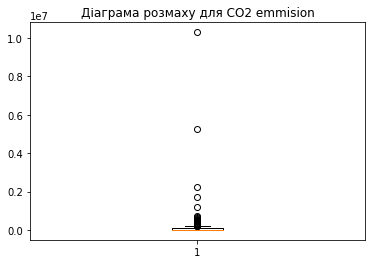

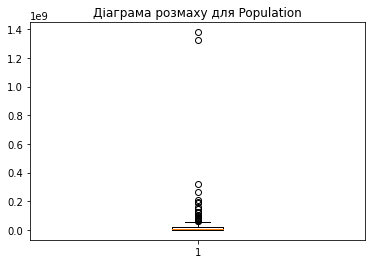

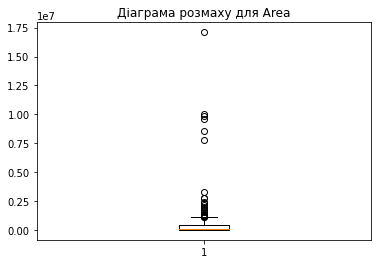

In [111]:
#Функція do_boxplot є вище у 8 п. завданнь на самоперевірку

do_boxplot(dFrame,'Діаграма розмаху для CO2 emmision', 'CO2 emission')
do_boxplot(dFrame,'Діаграма розмаху для Population', 'Population')
do_boxplot(dFrame,'Діаграма розмаху для Area', 'Area')
pyp.show()

Гістограми:

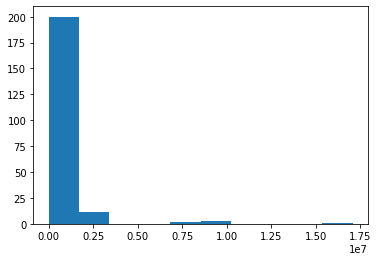

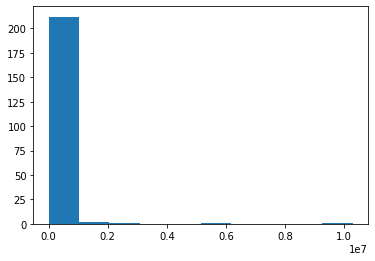

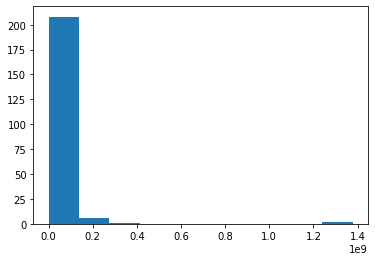

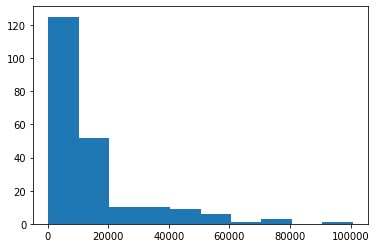

In [110]:
def do_hist(dataSet, column):
    pyp.hist(dataSet[column])
    pyp.show()

do_hist(dFrame, 'Area')
do_hist(dFrame, 'CO2 emission')
do_hist(dFrame, 'Population')
do_hist(dFrame, 'GDP per capita')

### 5.   Додавання стовпчика із щільністю населення

In [73]:
add_column(dFrame, 'Population density', dFrame['Population'] / dFrame['Area'])

### 6.   Країна, що має найбільший ВВП на людину, та країна, що має найменьшу площу

In [80]:
print('\nНайбільший ВВП по ППС у країни:')
print(dFrame['Country Name'][dFrame['GDP per capita'].idxmax()])
print('\nНайменьша площа у країни:')
print(dFrame['Country Name'][dFrame['Area'].idxmin()])


Найбільший ВВП по ППС у країни:
Luxembourg

Найменьша площа у країни:
Monaco


### 7. Регіон, в якому середня площа країн найбільша:

In [84]:
print(dFrame.groupby(['Region']).mean()['Area'].idxmax())

North America


### 8. Країни з чиїм населенням найчастіше зустрічаються у світі та у Європі?

In [93]:
print('\nКраїна з чиїм найчастіше зустрічаються найчастіше у світі:')
print(dFrame['Country Name'][dFrame['Population'].idxmax()])
print('\nКраїна з чиїм найчастіше зустрічаються найчастіше у Європі:')
dFrameEurope = dFrame.loc[dFrame['Region'] == "Europe & Central Asia"]
print(dFrameEurope['Country Name'][dFrameEurope['Population'].idxmax()])


Країна з чиїм найчастіше зустрічаються найчастіше у світі:
China

Країна з чиїм найчастіше зустрічаються найчастіше у Європі:
Russian Federation


### 9. Чи співпадає в якомусь регіоні середнє та медіанне ВВП?

In [96]:
means = dFrame.groupby(['Region']).mean()['GDP per capita']
medians = dFrame.groupby(['Region']).median()['GDP per capita']

print('Чи співпадає в якомусь регіоні середнє та медіанне ВВП?:')
print(p.merge(means, medians).any(axis=None))

Чи співпадає в якомусь регіоні середнє та медіанне ВВП?:
False


### 10. Топ 5 найкращіх та найгірших країн по ВВП та кількістю CO2 на душу населення:

In [107]:
print('\nТоп 5 найкращіх країн по ВВП по ППС:')
print(dFrame.sort_values(by=['GDP per capita'], ascending = False).head(5)['Country Name'])

print('\nТоп 5 найгірших країн по ВВП по ППС:')
print(dFrame.sort_values(by=['GDP per capita']).head(5)['Country Name'])


Топ 5 найкращіх країн по ВВП по ППС:
115          Luxembourg
188         Switzerland
116    Macao SAR, China
146              Norway
92              Ireland
Name: Country Name, dtype: object

Топ 5 найгірших країн по ВВП по ППС:
31                      Burundi
119                      Malawi
134                  Mozambique
37     Central African Republic
118                  Madagascar
Name: Country Name, dtype: object


In [109]:
add_column(dFrame, 'CO2 emission per capita', dFrame['CO2 emission'] / dFrame['Population'])

print('\nТоп 5 найкращіх країн по кількості CO2 на душу населення:')
print(dFrame.sort_values(by=['CO2 emission per capita'], ascending = False).head(5)['Country Name'])

print('\nТоп 5 найгірших країн по кількості CO2 на душу населення:')
print(dFrame.sort_values(by=['CO2 emission per capita']).head(5)['Country Name'])


Топ 5 найкращіх країн по кількості CO2 на душу населення:
182    St. Martin (French part)
163                  San Marino
130                      Monaco
145    Northern Mariana Islands
3                American Samoa
Name: Country Name, dtype: object

Топ 5 найгірших країн по кількості CO2 на душу населення:
31                      Burundi
175                     Somalia
38                         Chad
44             Congo, Dem. Rep.
37     Central African Republic
Name: Country Name, dtype: object
